<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%22%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D1%86%D0%B8%D1%82%D0%B0%D1%82_%D0%B4%D1%80%D0%B5%D0%B2%D0%BD%D0%B5%D0%B3%D1%80%D0%B5%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D1%84%D0%B8%D0%BB%D0%BE%D1%81%D0%BE%D1%84%D0%BE%D0%B2_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from keras.utils import np_utils

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = "/content/drive/MyDrive/Numpy/philosophy_dataset.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

In [4]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
print(char_to_int)

{'\n': 0, '\x0c': 1, ' ': 2, '!': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'c': 12, '«': 13, '»': 14, 'а': 15, 'б': 16, 'в': 17, 'г': 18, 'д': 19, 'е': 20, 'ж': 21, 'з': 22, 'и': 23, 'й': 24, 'к': 25, 'л': 26, 'м': 27, 'н': 28, 'о': 29, 'п': 30, 'р': 31, 'с': 32, 'т': 33, 'у': 34, 'ф': 35, 'х': 36, 'ц': 37, 'ч': 38, 'ш': 39, 'щ': 40, 'ъ': 41, 'ы': 42, 'ь': 43, 'э': 44, 'ю': 45, 'я': 46, 'ё': 47, '–': 48, '—': 49, '…': 50}


In [5]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  21016
Total Vocab:  51


In [6]:
seq_length = 1000
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  20016


In [7]:
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [8]:
model = Sequential()
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
#model.add(LSTM(256))
#model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [9]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [10]:
x = model.fit(X, y, epochs=70, batch_size=256, callbacks=callbacks_list)

Epoch 1/70
79/79 [==============================] - ETA: 0s - loss: 3.2862
Epoch 1: loss improved from inf to 3.28617, saving model to weights-improvement-01-3.2862.hdf5
79/79 [==============================] - 55s 618ms/step - loss: 3.2862
Epoch 2/70
79/79 [==============================] - ETA: 0s - loss: 3.2227
Epoch 2: loss improved from 3.28617 to 3.22274, saving model to weights-improvement-02-3.2227.hdf5
79/79 [==============================] - 47s 591ms/step - loss: 3.2227
Epoch 3/70
79/79 [==============================] - ETA: 0s - loss: 3.2173
Epoch 3: loss improved from 3.22274 to 3.21726, saving model to weights-improvement-03-3.2173.hdf5
79/79 [==============================] - 48s 603ms/step - loss: 3.2173
Epoch 4/70
79/79 [==============================] - ETA: 0s - loss: 3.2106
Epoch 4: loss improved from 3.21726 to 3.21065, saving model to weights-improvement-04-3.2106.hdf5
79/79 [==============================] - 47s 599ms/step - loss: 3.2106
Epoch 5/70
79/79 [======

In [13]:
history = x

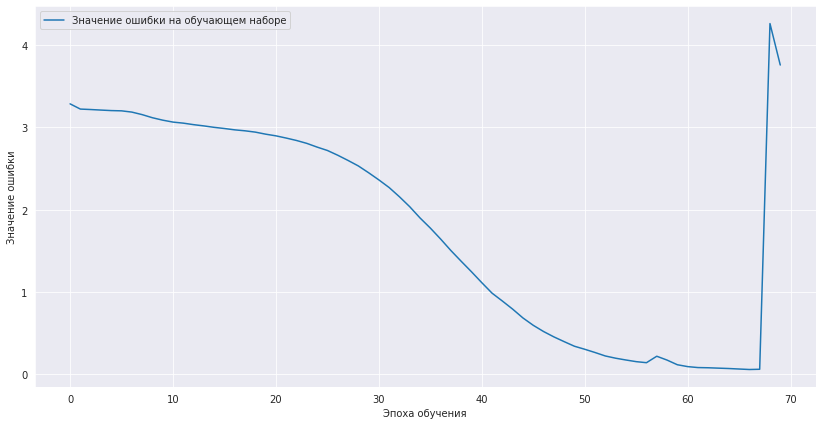

In [14]:
plt.figure(figsize = (14, 7))
plt.plot(history.history['loss'], label='Значение ошибки на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

In [15]:
# load the network weights
filename = "weights-improvement-67-0.0589.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [16]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [17]:
import sys

In [18]:
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Read:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nDone.")

Read:
" ь богатым и не кичиться этим; трудно быть бедным и не сетовать.
легче зажечь одну маленькую свечу, чем клясть темноту.
лишь когда приходят холода, становится ясно, что сосны и кипарисы последними теряют свой убор.
любимец деревни — враг добродетели.
люди в древности не любили много говорить. они считали позором для себя не поспеть за собственными
словами.
люди хотят для себя богатства и славы; если то и другое нельзя обрести честно, следует их избегать.
люди страшатся бедности и безвестности; если того и другого нельзя избежать, не теряя чести, следует их
принять.
можно всю жизнь проклинать темноту, а можно зажечь маленькую свечку.
молчание — великий друг, который никогда не изменит.
мудрая женщина старается изменять внешность, а не мужа.
мудрый муж радуется водам, человечный муж радуется горам. мудрый деятелен, человечный покоен.
мудрые радуются жизни, человечные живут долго.
мудрый не знает волнений, человечный не знает забот, смелый не знает страха.
мудрый человек не делает 